In [9]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/content/drive/MyDrive/SupervisedML_Y3/data.csv')

In [12]:
df.shape

(3735, 11)

In [13]:
df.head()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0


In [14]:
df.describe()

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
count,3735.000000,3735.000000,3.735000e+03,3.735000e+03,3735.000000,3735.000000,3735.000000,3735.000000,3735.000000,3.735000e+03,3735.00000
mean,48.214726,56.577510,5.187714e+05,1.362420e+05,33413.343775,30580.759036,25640.069076,23276.979384,8117.130388,2.087258e+05,0.42838
std,21.876949,19.066577,5.997837e+05,2.175501e+05,51970.930842,52681.858764,37159.039642,43921.116122,15522.904383,3.297073e+05,0.49491
min,1.000000,1.000000,2.160000e+02,1.380000e+02,32.000000,9.000000,2.000000,3.000000,6.000000,4.700000e+01,0.00000
25%,35.000000,43.000000,7.199650e+04,2.347200e+04,7402.000000,6908.500000,6240.000000,4862.000000,2247.000000,5.683000e+03,0.00000
50%,48.000000,56.000000,2.773820e+05,5.797200e+04,16481.000000,14928.000000,13841.000000,9739.000000,4440.000000,5.719800e+04,0.00000
75%,63.000000,69.000000,7.780680e+05,1.514855e+05,37721.500000,33147.500000,30236.000000,20796.500000,8813.000000,2.576875e+05,1.00000
max,100.000000,100.000000,3.598743e+06,3.194358e+06,699008.000000,785947.000000,595549.000000,443589.000000,289281.000000,2.328370e+06,1.00000


<Axes: >

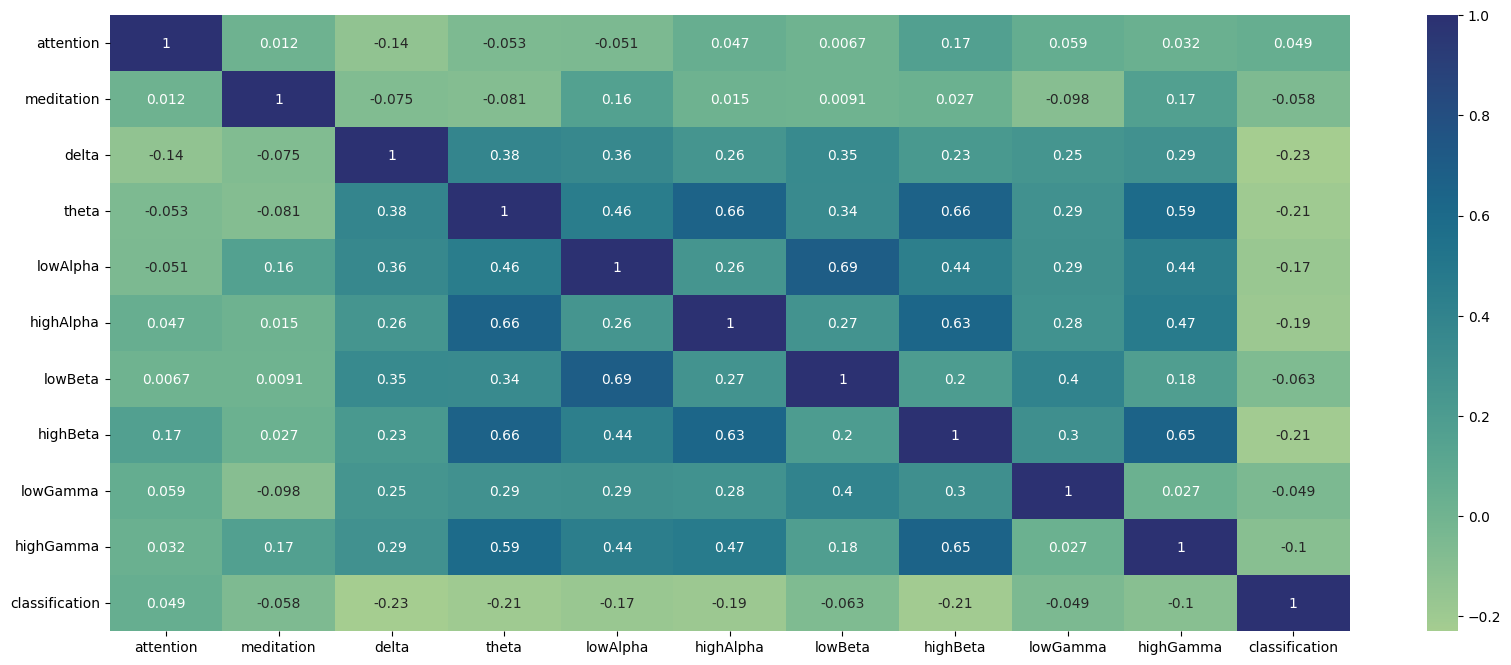

In [15]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), cmap="crest", annot=True)

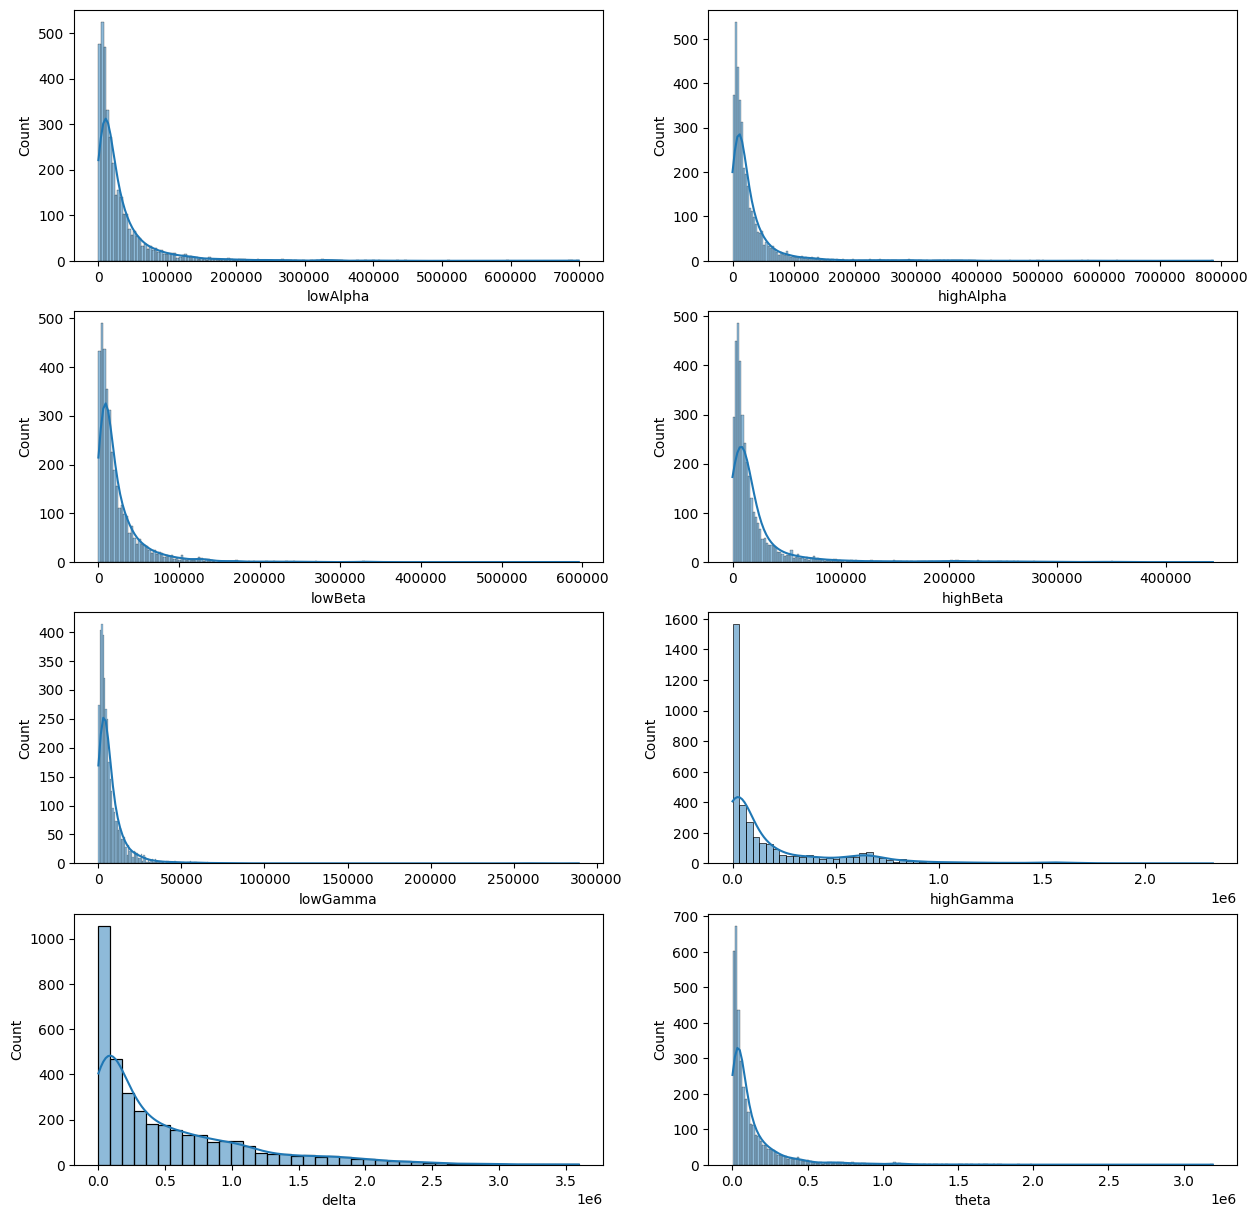

In [16]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

sns.histplot(data=df, x="lowAlpha", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="highAlpha", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="lowBeta", kde=True,  ax=axs[1, 0])
sns.histplot(data=df, x="highBeta", kde=True,  ax=axs[1, 1])
sns.histplot(data=df, x="lowGamma", kde=True,  ax=axs[2, 0])
sns.histplot(data=df, x="highGamma", kde=True, ax=axs[2, 1])
sns.histplot(data=df, x="delta", kde=True, ax=axs[3, 0])
sns.histplot(data=df, x="theta", kde=True, ax=axs[3, 1])
plt.show()

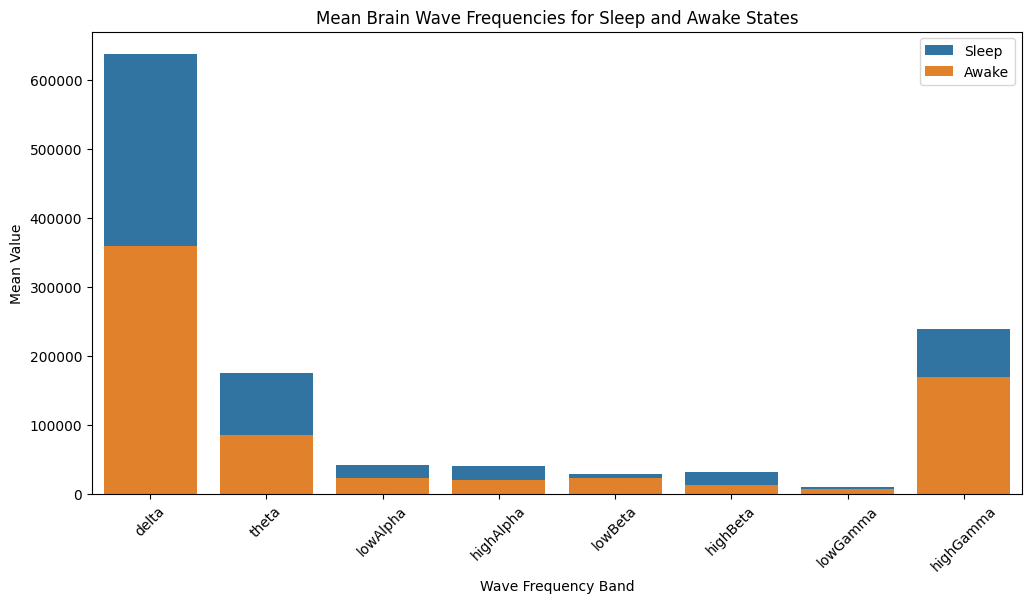

In [17]:
means_by_state = df.groupby('classification')[['delta', 'theta', 'lowAlpha', 'highAlpha',
                                                 'lowBeta', 'highBeta', 'lowGamma', 'highGamma']].mean()


means_by_state = means_by_state.T.reset_index()
means_by_state.columns = ['Wave Frequency Band', 'Sleep', 'Awake']
bands_order = ['delta', 'theta', 'lowAlpha', 'highAlpha',
               'lowBeta', 'highBeta', 'lowGamma', 'highGamma']

means_by_state = means_by_state[means_by_state['Wave Frequency Band'].isin(bands_order)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Wave Frequency Band', y='Sleep', data=means_by_state, label='Sleep')
sns.barplot(x='Wave Frequency Band', y='Awake', data=means_by_state, label='Awake')

plt.xlabel('Wave Frequency Band')
plt.ylabel('Mean Value')
plt.title('Mean Brain Wave Frequencies for Sleep and Awake States')
plt.legend()

plt.xticks(rotation=45)
plt.show()

## Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
X = df.drop(['classification'],axis=1)
y = df['classification']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

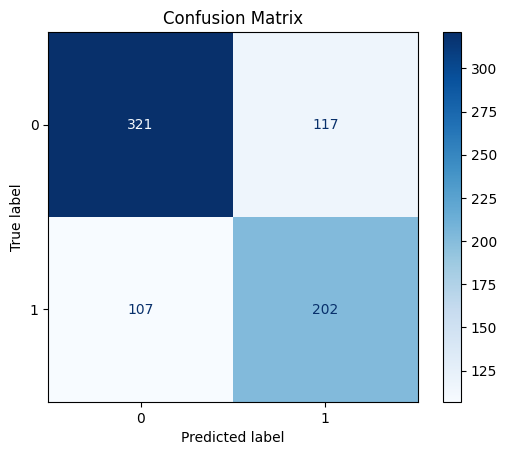

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

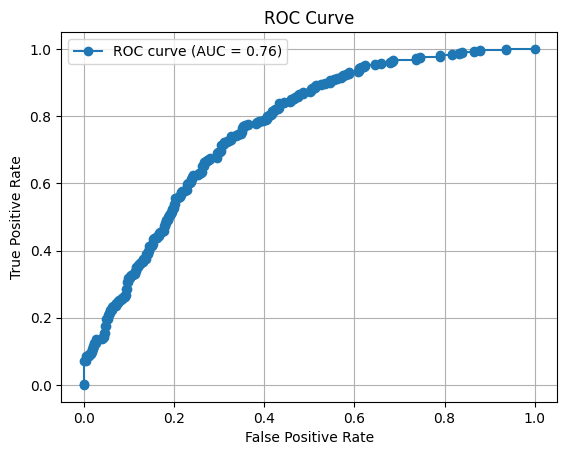

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, marker='o', label=f'ROC curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

<ipython-input-25-5a55bd4d0f53>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


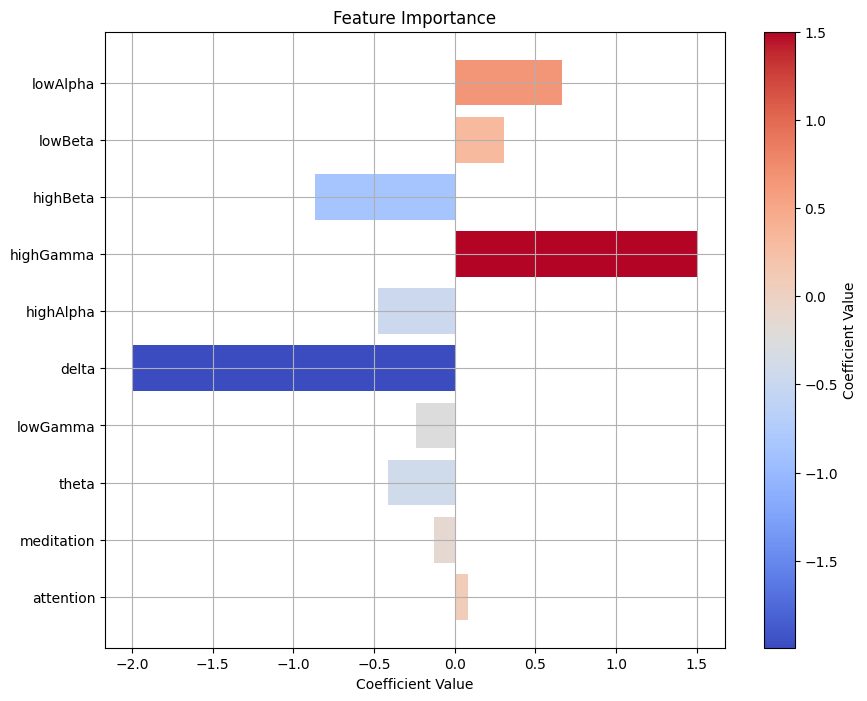

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

feature_names = df.columns
coefficients = model.coef_[0]

cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=min(coefficients), vmax=max(coefficients))

plt.figure(figsize=(10, 8))

bars = plt.barh(range(len(coefficients)), coefficients, color=cmap(norm(coefficients)), align='center')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Coefficient Value')

sorted_indices = np.argsort(np.abs(coefficients))
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.grid(True)

plt.show()

## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

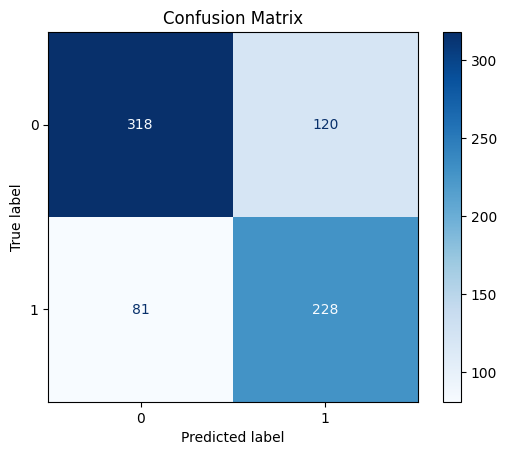

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [28]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.columns[indices]

high_threshold = np.percentile(importances, 75)
low_threshold = np.percentile(importances, 25)

<ipython-input-29-23e09479ccc7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features, palette=colors)


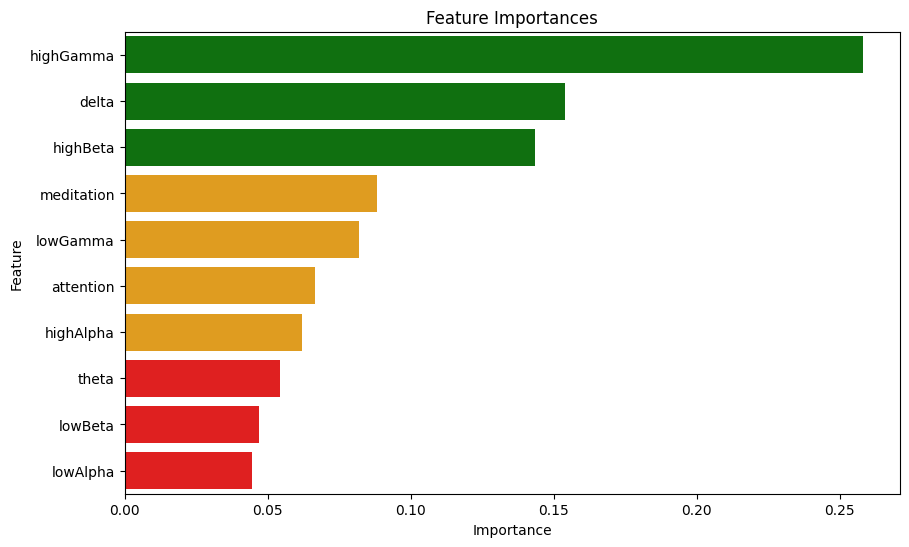

In [29]:
colors = []
for importance in importances[indices]:
    if importance >= high_threshold:
        colors.append('green')
    elif importance <= low_threshold:
        colors.append('red')
    else:
        colors.append('orange')

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
sns.barplot(x=importances[indices], y=features, palette=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Random Forest Classifier

n_estimators=100: Accuracy=0.7845
n_estimators=200: Accuracy=0.7912
n_estimators=300: Accuracy=0.7871
n_estimators=400: Accuracy=0.7952
n_estimators=500: Accuracy=0.7979
n_estimators=600: Accuracy=0.7952
n_estimators=700: Accuracy=0.8019
n_estimators=800: Accuracy=0.8005
n_estimators=900: Accuracy=0.7979
n_estimators=1000: Accuracy=0.7965
n_estimators=1100: Accuracy=0.7979
n_estimators=1200: Accuracy=0.7979
n_estimators=1300: Accuracy=0.7979
n_estimators=1400: Accuracy=0.7979
n_estimators=1500: Accuracy=0.7979
n_estimators=1600: Accuracy=0.7992
n_estimators=1700: Accuracy=0.7979
n_estimators=1800: Accuracy=0.7965
n_estimators=1900: Accuracy=0.7965


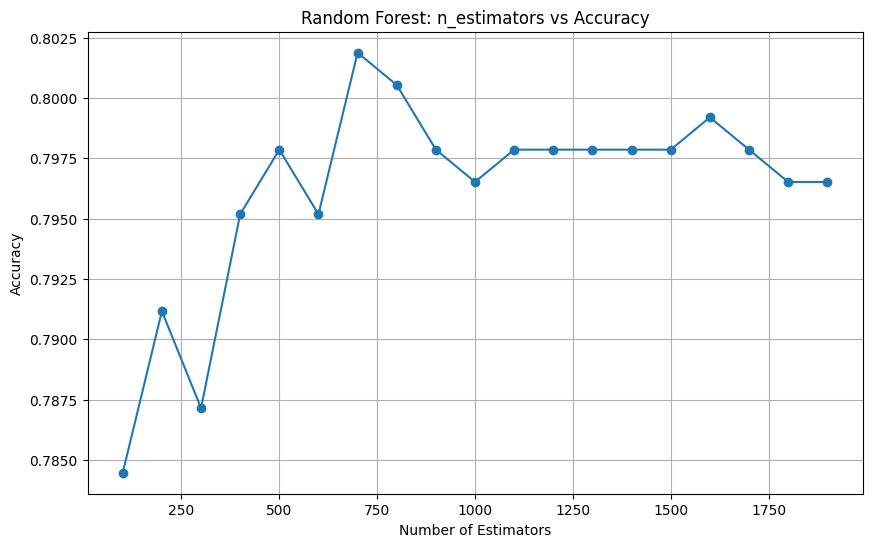

In [30]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators_list = range(100,2000,100)

accuracies = []

for n in n_estimators_list:
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"n_estimators={n}: Accuracy={accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, accuracies, marker='o')
plt.title('Random Forest: n_estimators vs Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
clf = RandomForestClassifier(n_estimators=700, random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=700, random_state=42)

In [33]:
y_pred = clf.predict(X_test_scaled)

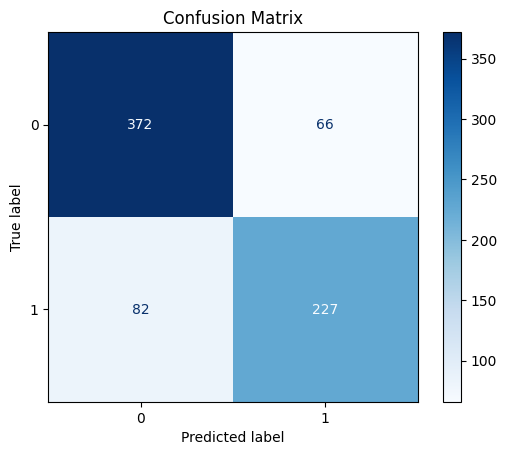

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.show()

In [35]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.columns[indices]

high_threshold = np.percentile(importances, 75)
low_threshold = np.percentile(importances, 25)

<ipython-input-36-23e09479ccc7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices], y=features, palette=colors)


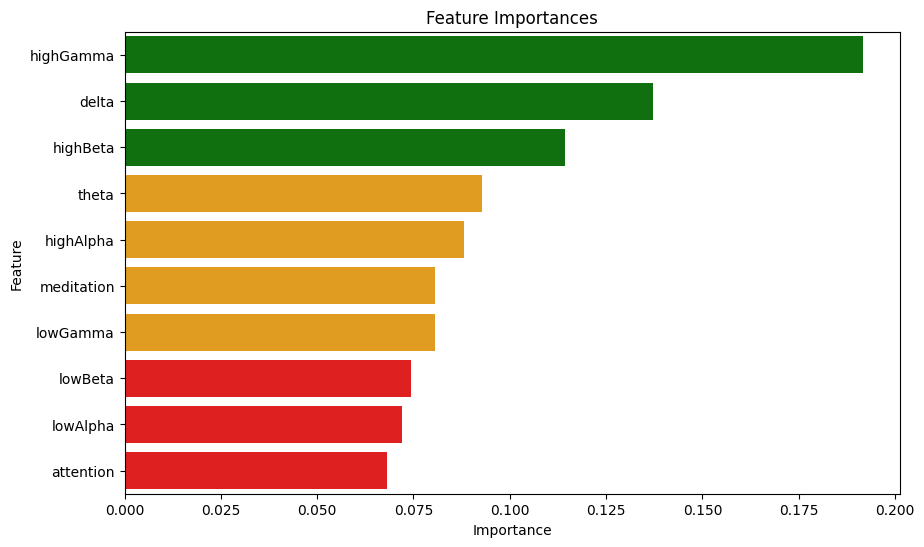

In [36]:
colors = []
for importance in importances[indices]:
    if importance >= high_threshold:
        colors.append('green')
    elif importance <= low_threshold:
        colors.append('red')
    else:
        colors.append('orange')

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
sns.barplot(x=importances[indices], y=features, palette=colors)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()